<a href="https://colab.research.google.com/github/dogspeech/Session-2/blob/main/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir
!pip install matplotlib
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [16]:
import yfinance as yf
import pandas as pd

stock_data = yf.download('TSLA', start='2022-01-01', end='2025-01-01') # 애플
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 날짜를 숫자로 변환 (단순히 날짜를 '일'로 처리)
stock_data['Date'] = stock_data.index
stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)

# 종가와 날짜 데이터 준비
X = stock_data['Date'].values.reshape(-1, 1)  # 독립 변수: 날짜
y = stock_data['Close'].values  # 종속 변수: 종가

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

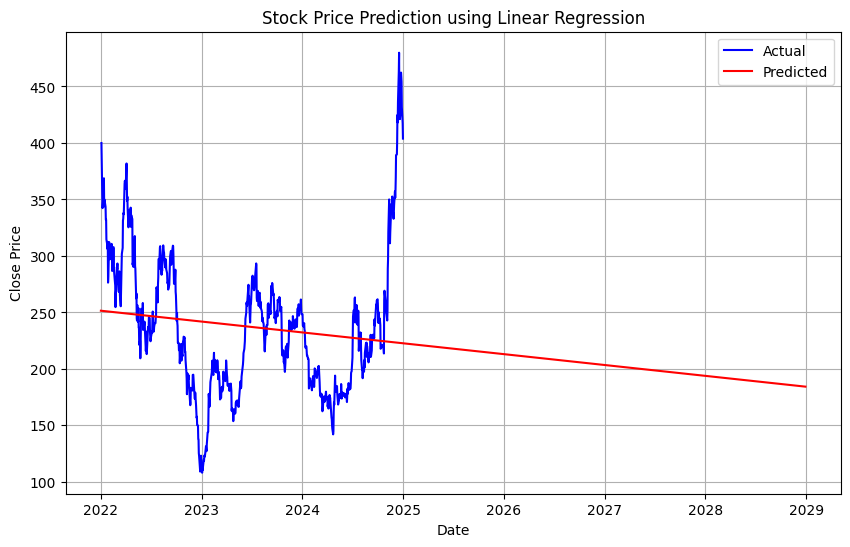

In [18]:
# 예측할 미래 날짜 생성 (예시로 2023년 12월 31일까지)
future_dates = pd.date_range(start='2022-01-01', periods=365*7, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# 예측 결과
predictions = model.predict(future_dates_ordinal)

# 예측된 값과 실제 값을 비교하기 위한 시각화
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Actual', color='blue')  # 실제 종가
plt.plot(future_dates, predictions, label='Predicted', color='red')  # 예측 종가
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()